# Introduction to Deep Learning and Neural Networks

By the end of the session students should be able to:

- Explain why deep learning can outperform classical ML on complex data types.

- Build and train a feedforward neural network (MLP) using TensorFlow and Keras.

- Understand forward pass, activation functions, and backpropagation at a conceptual level.

- Recognize and mitigate overfitting (dropout, L2, early stopping).

- Visualize learning curves and interpret model behavior.

## What is Deep Learning and How is it Different from Machine Learning?

**Machine Learning (ML)** is a broad field of artificial intelligence that enables systems to learn from data, identify patterns, and make decisions with minimal human intervention. Traditional ML algorithms often require **manual feature engineering**, where domain experts identify and extract relevant features from the raw data. Examples include algorithms like Linear Regression, Support Vector Machines (SVMs), Decision Trees, and K-Means Clustering.

**Deep Learning (DL)** is a subfield of machine learning that utilizes **artificial neural networks** with multiple layers (hence "deep"). The key difference lies in the **automatic feature learning**. Deep learning models can automatically learn hierarchical representations of the data directly from the raw input, without the need for manual feature engineering. This is particularly powerful for complex, high-dimensional data like images, audio, and text.

**Key Differences:**

*   **Feature Engineering:** ML requires manual feature engineering; DL learns features automatically.
*   **Data Requirements:** DL models typically require vast amounts of data to perform well, while some ML algorithms can work with smaller datasets.
*   **Model Complexity:** DL models are generally more complex and computationally intensive to train than traditional ML models.
*   **Performance on Complex Data:** DL often outperforms traditional ML on complex, unstructured data where manual feature extraction is difficult or impossible.
*   **Interpretability:** Traditional ML models are often more interpretable (easier to understand why a prediction was made) than deep learning models, which can be considered "black boxes."

**When to Use Deep Learning Instead of Machine Learning:**

Consider using deep learning when:

*   You have a **large amount of data** available.
*   The data is **complex and unstructured** (e.g., images, audio, text, time series).
*   **Manual feature engineering is difficult, time-consuming, or requires significant domain expertise.**
*   You need to achieve **state-of-the-art performance** on tasks like image recognition, natural language processing, or speech recognition.
*   You have the **computational resources** (e.g., GPUs) to train deep learning models.

In scenarios with limited data, structured data, or when interpretability is paramount, traditional machine learning methods might be more suitable.





![](https://builtin.com/sites/www.builtin.com/files/styles/og/public/2022-04/what-is-deep-learning.png)

Let's elaborate on the points from the previous section:

1.  **Why deep learning for healthcare?**

    *   **Learns representations from raw data:** Unlike traditional machine learning which often requires manual feature engineering, deep learning models can automatically learn complex patterns and features directly from raw data. This is particularly powerful for healthcare data like medical images (identifying subtle visual cues in X-rays, MRIs, etc.), biosignals (analyzing ECG or EEG data), and even complex genomic or electronic health record data where the important features and their interactions may not be immediately obvious.
    *   **Good at complex, high-dimensional tasks:** Healthcare often involves data with many variables and intricate relationships. Deep learning excels at handling such high-dimensional data and learning non-linear relationships, making it suitable for tasks like classifying medical images, predicting disease risk, or analyzing complex biological data.
    *   **Note on considerations:** While powerful, applying deep learning in healthcare requires careful consideration of data privacy and security, rigorous validation with independent datasets to ensure generalizability, and efforts towards interpretability or explainability to understand *why* a model makes a certain prediction, which is crucial for clinical trust and decision-making.

2.  **Basics**

    *   **Perceptron:** This is the simplest form of a neural network, a linear model that takes a weighted sum of inputs, adds a bias, and passes it through a step activation function to produce a binary output (0 or 1). It can only solve linearly separable problems.
    *   **Neuron:** The fundamental unit of a neural network. It takes multiple inputs, each multiplied by a weight, sums them up, adds a bias ($b$), and then applies a non-linear **activation function** f to the result \(sum_i w_i x_i + b$\). This non-linearity is key to learning complex patterns.
    *   **Activation Functions:** These functions introduce non-linearity into the network, allowing it to learn more complex relationships than a simple linear model.
        *   **Sigmoid:** Squashes the output to a range between 0 and 1, often used in the output layer for binary classification tasks. Can suffer from the "vanishing gradient" problem.
        *   **Softmax:** Used in the output layer for multi-class classification. It converts a vector of numbers into a probability distribution, where the sum of probabilities is 1.
        *   **ReLU (Rectified Linear Unit):** A popular choice for hidden layers. It outputs the input directly if it's positive, and zero otherwise ($f(x) = max(0, x)$). It helps mitigate the vanishing gradient problem and is computationally efficient.
        *   **LeakyReLU:** A variation of ReLU that allows a small, non-zero gradient when the input is negative, which can sometimes prevent "dying ReLUs".
    *   **Loss Function:** Measures how well the model's predictions match the actual target values. The goal of training is to minimize this loss.
        *   **Cross-entropy:** Commonly used for classification tasks. It measures the difference between the predicted probability distribution and the true distribution.
        *   **MSE (Mean Squared Error):** Commonly used for regression tasks. It measures the average squared difference between the predicted and actual values.
    *   **Backpropagation:** The core algorithm used to train neural networks. It involves:
        *   **Forward Pass:** Input data is passed through the network to generate predictions.
        *   **Compute Loss:** The loss function is used to calculate the error between predictions and actual values.
        *   **Backward Pass:** The error is propagated backward through the network. Using the chain rule of calculus, the gradient of the loss with respect to each weight and bias in the network is calculated.
        *   **Optimizer:** An algorithm (like SGD, Adam, RMSprop) uses these gradients to update the weights and biases in a way that reduces the loss. This process is repeated iteratively over the training data.

3.  **Architecture & parameters**

    *   **Layers:** Neural networks are composed of layers of neurons.
        *   **Input Layer:** Receives the raw data. The number of neurons typically equals the number of features in the input data.
        *   **Hidden Layers:** One or more layers between the input and output layers. These layers learn increasingly complex representations of the data. **Dense (or Fully Connected) layers** are common where each neuron in a layer is connected to every neuron in the previous layer.
        *   **Output Layer:** Produces the final prediction. The number of neurons and the activation function depend on the task (e.g., 1 neuron with sigmoid for binary classification, multiple neurons with softmax for multi-class classification).
    *   **Parameters (Hyperparameters):** These are settings that are not learned by the model but are set before training. They significantly impact model performance.
        *   **Number of layers and units per layer:** Defines the network's capacity. More layers and units can learn more complex patterns but increase the risk of overfitting.
        *   **Learning Rate:** Controls the step size the optimizer takes when updating weights during training. A high learning rate can lead to instability, while a low one can make training very slow.
        *   **Batch Size:** The number of training examples used in one iteration of the optimization algorithm.
        *   **Optimizer:** The specific algorithm used to update weights (e.g., Adam, SGD with momentum).
    *   **Model Capacity and Overfitting Risk:** A model with more parameters (more layers/units) has higher capacity, meaning it can learn more complex functions. However, this also increases the risk of overfitting, where the model learns the training data too well, including the noise, and performs poorly on unseen data.

4.  **Overfitting & regularization**

    *   **Overfitting Signs:** The most common indicator is when the model's performance on the training data continues to improve (training loss decreases), but its performance on unseen validation data starts to degrade (validation loss increases). This means the model is memorizing the training data rather than learning generalizable patterns.
    *   **Methods:** Techniques used to prevent or reduce overfitting.
        *   **Dropout:** During training, randomly sets a fraction of the neurons in a layer to zero for each training example. This prevents neurons from becoming too reliant on specific other neurons, forcing the network to learn more robust features and reducing co-adaptation. It's like training multiple slightly different networks simultaneously.
        *   **L1/L2 Regularization (kernel_regularizer in Keras):** Adds a penalty to the loss function based on the magnitude of the weights. L1 (Lasso) encourages sparsity (many weights become zero), while L2 (Ridge) encourages smaller weights. This discourages overly complex models. `kernel_regularizer` applies this penalty to the weights of the layer.
        *   **Data Augmentation (for images):** Creating new training examples by applying transformations (like rotation, zooming, flipping) to the existing data. This increases the diversity of the training data and makes the model more robust.
        *   **Early Stopping:** Monitoring the model's performance on the validation set during training and stopping the training process when the validation performance starts to degrade, even if the training performance is still improving. This prevents the model from overfitting by stopping at the point of optimal generalization.

## Hands-on step-by-step (Keras/TensorFlow)

## Dataset Information

The dataset used here is the **Breast Cancer Wisconsin (Diagnostic) Dataset**, which is a built-in dataset available in the `sklearn.datasets` module.

This dataset is a classic binary classification dataset. The task is to classify a tumor as either malignant (cancerous, target=0) or benign (non-cancerous, target=1) based on various characteristics of the cell nuclei present in the digitized image of a fine needle aspirate (FNA) of a breast mass.

![](https://www.verywellhealth.com/thmb/LoHuaSfq_qbKGtSNk3yWBeS0f7s=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/514240-article-img-malignant-vs-benign-tumor2111891f-54cc-47aa-8967-4cd5411fdb2f-5a2848f122fa3a0037c544be.png)

## Feature Explanation

The dataset contains 30 features, which are computed from the digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei, such as their size, shape, and texture.

Here's a brief explanation of the mean values of the features (there are also features for standard error and "worst" or largest mean values for each characteristic):

*   **mean radius:** mean of distances from center to points on the perimeter
*   **mean texture:** standard deviation of gray-scale values
*   **mean perimeter:** mean size of the core tumor
*   **mean area:** mean area of the tumor
*   **mean smoothness:** mean of local variation in radius lengths
*   **mean compactness:** mean of perimeter^2 / area - 1.0
*   **mean concavity:** mean of the severity of concave portions of the contour
*   **mean concave points:** mean for number of concave portions of the contour
*   **mean symmetry:** mean symmetry of the cell nuclei
*   **mean fractal dimension:** mean of "coastline approximation" - 1

In [ ]:
# !pip install keras tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks, optimizers
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 and 1 values

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
y.value_counts()

,count
1,357
0,212


In [2]:
# Train/validation/test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42) # 100% of the data, take out 15% as your test
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1765, stratify=y_trainval, random_state=42) #85% left, take out 15% of 85% as your val
# (Resulting roughly 70/15/15)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (397, 30)
Shape of X_test: (86, 30)
Shape of X_val: (86, 30)
Shape of y_train: (397,)
Shape of y_test: (86,)
Shape of y_val: (86,)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
def build_mlp(input_shape, hidden_units=[64,32], dropout_rate=0.2, l2_reg=1e-4):
    inputs = layers.Input(shape=(input_shape,))
    x = inputs
    for units in hidden_units:
        x = layers.Dense(units, activation='relu',
                         kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs, outputs)
    return model

model = build_mlp(input_shape=X_train_scaled.shape[1], hidden_units=[64, 32], dropout_rate=0.3, l2_reg=1e-4)
model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mc = callbacks.ModelCheckpoint('best_mlp.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[es, mc],
    verbose=2
)

Epoch 1/100
13/13 - 8s - 606ms/step - accuracy: 0.6272 - loss: 0.6591 - val_accuracy: 0.8837 - val_loss: 0.4874
Epoch 2/100
13/13 - 0s - 11ms/step - accuracy: 0.8564 - loss: 0.4503 - val_accuracy: 0.9651 - val_loss: 0.3146
Epoch 3/100
13/13 - 0s - 10ms/step - accuracy: 0.9295 - loss: 0.3125 - val_accuracy: 0.9651 - val_loss: 0.2061
Epoch 4/100
13/13 - 0s - 10ms/step - accuracy: 0.9421 - loss: 0.2241 - val_accuracy: 0.9767 - val_loss: 0.1444
Epoch 5/100
13/13 - 0s - 10ms/step - accuracy: 0.9597 - loss: 0.1706 - val_accuracy: 0.9767 - val_loss: 0.1100
Epoch 6/100
13/13 - 0s - 10ms/step - accuracy: 0.9370 - loss: 0.1654 - val_accuracy: 0.9767 - val_loss: 0.0867
Epoch 7/100
13/13 - 0s - 10ms/step - accuracy: 0.9647 - loss: 0.1231 - val_accuracy: 0.9767 - val_loss: 0.0714
Epoch 8/100
13/13 - 0s - 10ms/step - accuracy: 0.9723 - loss: 0.1173 - val_accuracy: 0.9884 - val_loss: 0.0613
Epoch 9/100
13/13 - 0s - 16ms/step - accuracy: 0.9597 - loss: 0.1132 - val_accuracy: 0.9884 - val_loss: 0.0555


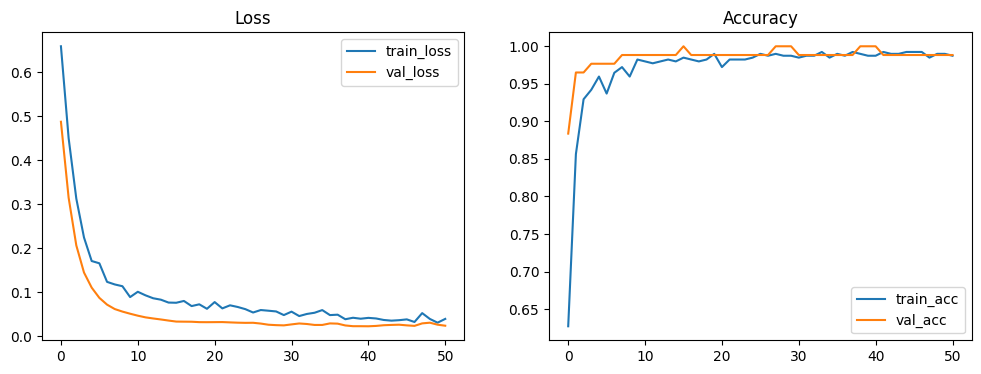

In [ ]:
def plot_history(hist):
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    axs[0].plot(hist.history['loss'], label='train_loss')
    axs[0].plot(hist.history['val_loss'], label='val_loss')
    axs[0].set_title('Loss')
    axs[0].legend()

    axs[1].plot(hist.history['accuracy'], label='train_acc')
    axs[1].plot(hist.history['val_accuracy'], label='val_acc')
    axs[1].set_title('Accuracy')
    axs[1].legend()
    plt.show()

plot_history(history)

### Step 1. Look at the metrics evolution

| Epoch range | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss | Comment                                                                          |
| ----------- | ----------------- | ------------------- | ------------- | --------------- | -------------------------------------------------------------------------------- |
| 1–3         | 0.63 → 0.93       | 0.88 → 0.96         | 0.66 → 0.31   | 0.49 → 0.20     | Model learning rapidly — **healthy learning phase**                              |
| 4–10        | 0.94 → 0.98       | 0.97 → 0.99         | 0.22 → 0.09   | 0.14 → 0.05     | Validation and training improving together — **still healthy**                   |
| 11–25       | 0.97–0.99         | 0.99                | 0.09 → 0.06   | 0.04 → 0.03     | Training loss slightly above validation (no gap) — **excellent generalization**  |
| 26–51       | 0.98–0.99         | 0.99–1.00           | 0.06 → 0.03   | 0.03 → 0.02     | Validation accuracy = 100%, validation loss slightly smaller — **no divergence** |


### Step 2. Interpretation

#### ✅ No sign of overfitting

- Validation accuracy keeps up with training accuracy (even reaches 1.00).

- Validation loss continues to decrease, rather than increasing.

- There’s no widening gap between training and validation losses.

#### ✅ No sign of underfitting

- Training accuracy is near-perfect (≈99%).

- Loss is low (<0.05).

- Model clearly captures data patterns.

#### ✅ Indication of good fit (excellent generalization)

- The model has enough capacity to fit the training data but still generalizes to unseen validation data.

- Dropout and L2 regularization are doing their job well.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        32
           1       0.98      0.93      0.95        54

    accuracy                           0.94        86
   macro avg       0.93      0.95      0.94        86
weighted avg       0.95      0.94      0.94        86

ROC-AUC: 0.9930555555555556


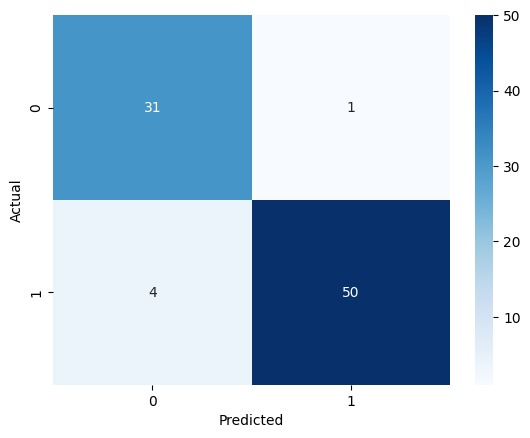

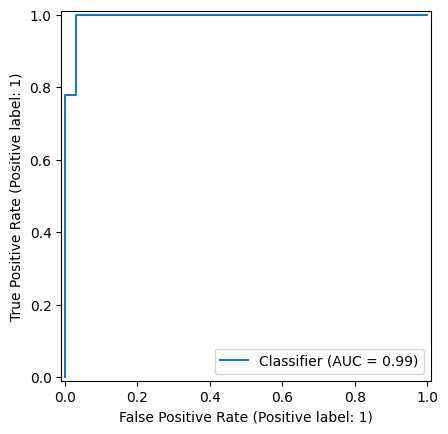

In [ ]:
# Load best model if you used checkpoint
best = models.load_model('best_mlp.keras')

y_pred_proba = best.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba >= 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
RocCurveDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

### Model Performance Interpretation

The plots above show the training and validation **loss** and **accuracy** over a specified number of epochs.  
- **Loss Plot:** Both training and validation losses decrease steadily and converge near zero, indicating that the model is learning effectively without significant overfitting.  
- **Accuracy Plot:** The accuracy for both training and validation rapidly improves and stabilizes above 95%, with the validation accuracy slightly higher than training accuracy — a sign of good generalization.  

Overall, the model demonstrates excellent convergence, strong learning behavior, and no major signs of underfitting or overfitting.


## Assignment 1: Conceptual Understanding

Based on the information and code provided in this notebook, answer the following questions to demonstrate your understanding of key deep learning concepts:

1.  **Deep Learning vs. Machine Learning:** Explain, in your own words, the fundamental difference between traditional Machine Learning and Deep Learning, particularly in the context of feature engineering. Why is this difference significant when working with complex data like images or medical records?
2.  **The Neuron:** Describe the basic function of a single neuron in a neural network. What are the key components (inputs, weights, bias, activation function), and how do they contribute to the neuron's output?
3.  **Activation Functions:** Why are non-linear activation functions necessary in a neural network? Explain the purpose of at least two different activation functions discussed (e.g., Sigmoid, ReLU, Softmax) and when you might use each one.
4.  **Loss Function:** What is the role of a loss function during neural network training? Explain how the choice of loss function relates to the type of task (e.g., classification vs. regression).
5.  **Backpropagation and Optimization:** Briefly explain the overall process of backpropagation. How does an optimizer use the information from backpropagation to update the model's weights and biases?
6.  **Overfitting:** What is overfitting in the context of training a neural network? How can you identify if your model is overfitting?
7.  **Regularization Techniques:** Describe at least two techniques discussed in the notebook (e.g., Dropout, L2 Regularization, Early Stopping) that can be used to mitigate overfitting. How does each technique help improve the model's generalization ability?
8.  **Interpreting Learning Curves:** Looking at the provided learning curves (plots of loss and accuracy over epochs), what specific patterns would indicate that a model is overfitting? What patterns would suggest underfitting?
9.  **Model Evaluation Metrics:** Explain the meaning and significance of at least two evaluation metrics used for the classification task in this notebook (e.g., Accuracy, Precision, Recall, F1-score, ROC-AUC). Why is it important to look at multiple metrics rather than just accuracy?
10. **Applying Concepts:** If you were to apply deep learning to a new healthcare problem (e.g., predicting disease progression from patient data), what are some initial considerations you would have regarding data, model architecture, and potential challenges?

## Assignment 2

Your task is to explore another dataset from the `sklearn.datasets` module and apply the deep learning workflow we've covered in this notebook.

Here are the steps you should follow:

1.  **Choose a Dataset:** Select `load_boston()` dataset from `sklearn.datasets`. (Note: This is a regression dataset, so you'll need to adjust the output layer and loss function accordingly).
2.  **Load and Explore the Data:**
    *   Load the dataset using the appropriate `sklearn` function.
    *   Examine the data: look at the features, target variable, and check for any missing values (though `sklearn` datasets are generally clean).
    *   Understand the nature of the problem (binary or multi-class classification, or regression).
3.  **Data Preparation:**
    *   Split the data into training, validation, and test sets. Aim for a similar split ratio as in the example (e.g., 70/15/15). Remember to stratify if it's a classification problem.
    *   Scale the features using `StandardScaler`. Fit the scaler only on the training data and transform all sets.
4.  **Build the MLP Model:**
    *   Adapt the `build_mlp` function or create a new Keras Sequential model.
    *   Choose appropriate hidden layer sizes and activation functions.
    *   Select an appropriate output layer and activation function based on your task (sigmoid for binary classification, softmax for multi-class classification, linear for regression).
    *   Consider adding regularization (Dropout, L2) to mitigate overfitting.
5.  **Compile the Model:**
    *   Choose a suitable optimizer (e.g., Adam).
    *   Select an appropriate loss function (`binary_crossentropy` for binary classification, `categorical_crossentropy` for multi-class classification, `mse` for regression).
    *   Include relevant metrics (e.g., `accuracy` for classification, `mse` for regression).
6.  **Train the Model:**
    *   Train the model using the training and validation data.
    *   Implement Early Stopping and Model Checkpointing to save the best model based on validation performance.
7.  **Evaluate the Model:**
    *   Load the best saved model.
    *   Evaluate the model on the unseen test set.
    *   For classification, generate and interpret the `classification_report`, `confusion_matrix`, and `ROC-AUC` score/curve.
    *   For regression, evaluate metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).
8.  **Visualize Results:**
    *   Plot the training and validation loss and accuracy (or chosen metric) over epochs.
    *   Interpret the plots to assess for signs of overfitting or underfitting.
9.  **Summarize Findings:**
    *   Write a brief summary of your model's performance on the test set and discuss any observations about the training process.